# Fraud Detection in Electricity and Gas Consumption Challenge

This challenge is meant to ....

### Importing necessary packages for data handling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting data

In [2]:
train_path = "x__data/train"
test_path = "x__data/test"


client_train = pd.read_csv(f"{train_path}/client_train.csv")
invoice_train = pd.read_csv(f"{train_path}/invoice_train.csv", low_memory=False)

client_test = pd.read_csv(f"{test_path}/client_test.csv")
invoice_test = pd.read_csv(f"{test_path}/invoice_test.csv")

In [3]:
d = {"ELEC":0, "GAZ":1}
invoice_train["counter_type"] = invoice_train["counter_type"].map(d)
invoice_test["counter_type"] = invoice_test["counter_type"].map(d)

In [4]:
invoice_test

client_id invoice_date  tarif_type  counter_number  \
0           test_Client_0   2018-03-16          11          651208   
1           test_Client_0   2014-03-21          11          651208   
2           test_Client_0   2014-07-17          11          651208   
3           test_Client_0   2015-07-13          11          651208   
4           test_Client_0   2016-07-19          11          651208   
...                   ...          ...         ...             ...   
1939725  test_Client_9999   2010-03-11          11          869269   
1939726  test_Client_9999   2011-03-15          11          869269   
1939727  test_Client_9999   2012-12-03          11          869269   
1939728  test_Client_9999   2009-07-01          11          869269   
1939729  test_Client_9999   2017-03-11          11          869269   

         counter_statue  counter_code  reading_remarque  counter_coefficient  \
0                     0           203                 8                    1   
1                     0           203                 8                    1   
2                     0           203                 8                    1   
3                     0           203                 9                    1   
4                     0           203                 9                    1   
...                 ...           ...               ...                  ...   
1939725               0           203                 6                    1   
1939726               0           203                 6                    1   
1939727               0           203                 6                    1   
1939728               0           203                 6                    1   
1939729               0           203                 9                    1   

         consommation_level_1  consommation_level_2  consommation_level_3  \
0                         755                     0                     0   
1                        1067                     0                     0   
2                           0                     0                     0   
3                         410                     0                     0   
4                         412                     0                     0   
...                       ...                   ...                   ...   
1939725                   248                     0                     0   
1939726                   260                     0                     0   
1939727                   312                     0                     0   
1939728                   236                     0                     0   
1939729                   800                   282                     0   

         consommation_level_4  old_index  new_index  months_number  \
0                           0      19145      19900              8   
1                           0      13725      14792              8   
2                           0      14792      14792              4   
3                           0      16122      16532              4   
4                           0      17471      17883              4   
...                       ...        ...        ...            ...   
1939725                     0      21114      21362              4   
1939726                     0      21362      21622              4   
1939727                     0      22272      22584              4   
1939728                     0      19909      20145              4   
1939729                     0      32834      33916              4   

         counter_type  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
1939725             0  
1939726             0  
1939727             0  
1939728             0  
1939729             0  

[1939730 rows x 16 columns]

In [5]:
client_train

disrict           client_id  client_catg  region creation_date  target
0            60      train_Client_0           11     101    31/12/1994     0.0
1            69      train_Client_1           11     107    29/05/2002     0.0
2            62     train_Client_10           11     301    13/03/1986     0.0
3            69    train_Client_100           11     105    11/07/1996     0.0
4            62   train_Client_1000           11     303    14/10/2014     0.0
...         ...                 ...          ...     ...           ...     ...
135488       62  train_Client_99995           11     304    26/07/2004     0.0
135489       63  train_Client_99996           11     311    25/10/2012     0.0
135490       63  train_Client_99997           11     311    22/11/2011     0.0
135491       60  train_Client_99998           11     101    22/12/1993     0.0
135492       60  train_Client_99999           11     101    18/02/1986     0.0

[135493 rows x 6 columns]

In [6]:
invoice_train[invoice_train["client_id"]==client_train["client_id"].sample(1).values[0]].sort_values("invoice_date")

client_id invoice_date  tarif_type  counter_number  \
4330256  train_Client_9601   2017-11-10          11   2168700025839   
4330260  train_Client_9601   2018-04-06          11   2168700025839   
4330257  train_Client_9601   2018-09-02          11   2168700025839   
4330259  train_Client_9601   2019-06-14          11   2168700025839   
4330258  train_Client_9601   2019-12-02          11   2168700025839   

        counter_statue  counter_code  reading_remarque  counter_coefficient  \
4330256              0           420                 9                    1   
4330260              0           420                 9                    1   
4330257              0           420                 9                    1   
4330259              0           420                 9                    1   
4330258              0           420                 9                    1   

         consommation_level_1  consommation_level_2  consommation_level_3  \
4330256                    25                     0                     0   
4330260                   359                     0                     0   
4330257                   363                     0                     0   
4330259                   272                     0                     0   
4330258                  1048                     0                     0   

         consommation_level_4  old_index  new_index  months_number  \
4330256                     0          0         25              5   
4330260                     0        388        747              4   
4330257                     0         25        388              4   
4330259                     0       1795       2067              4   
4330258                     0        747       1795              8   

         counter_type  
4330256             0  
4330260             0  
4330257             0  
4330259             0  
4330258             0

### Feature Ideas
- counter count
- modal counter remarque
- invoice count
- new_index - old_index
- total consomation per days (total consommation / days span)

### EDA

#### Checking the features

In [7]:
client_train.dtypes

disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object

In [8]:
invoice_train.dtypes

client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type             int64
dtype: object

#### Inspecting Features of Client data for trends

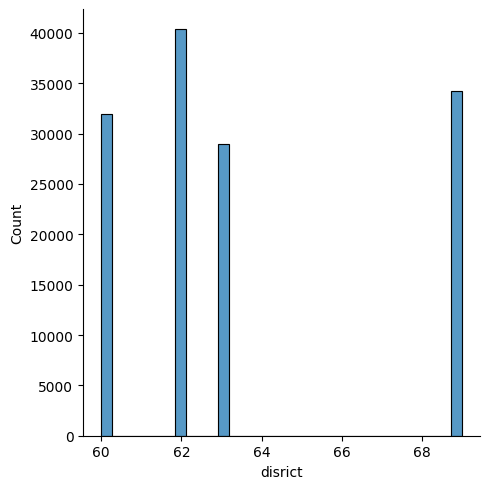

In [7]:
sns.displot(client_train["disrict"])
plt.show()

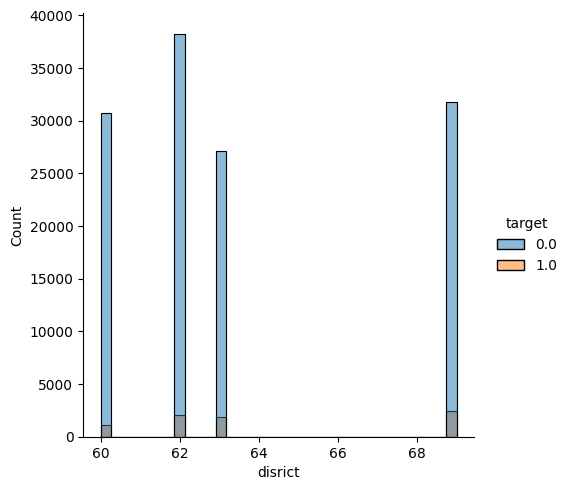

In [8]:
sns.displot(client_train, x="disrict", hue="target")
plt.show()

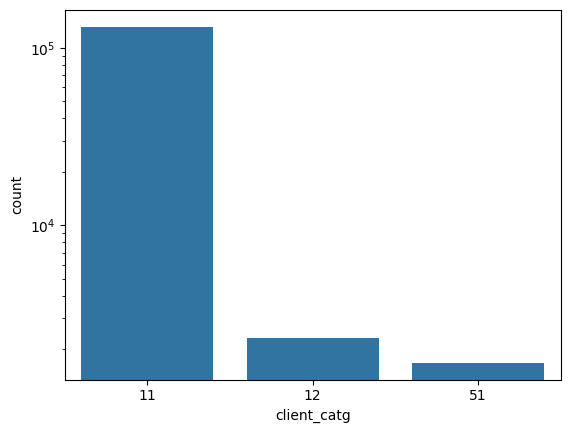

In [9]:
fig, ax = plt.subplots()
sns.countplot(client_train, x="client_catg", ax=ax)
ax.set_yscale("log")
plt.show()

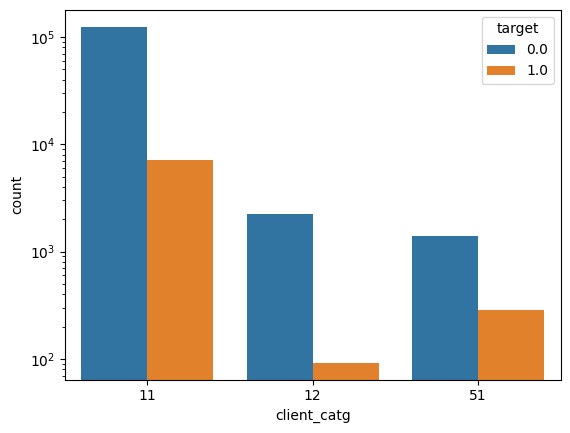

In [10]:
fig, ax = plt.subplots()
sns.countplot(client_train, x="client_catg", ax=ax, hue="target")
ax.set_yscale("log")
plt.show()

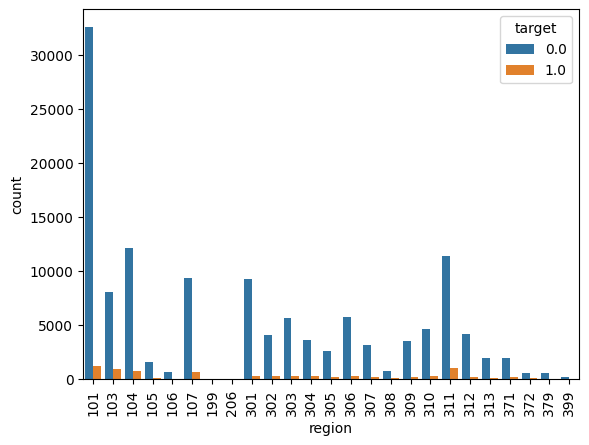

In [11]:
fig, ax = plt.subplots()
sns.countplot(client_train, x="region", ax=ax, hue="target")
# ax.set_yscale("log")
# ax.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

### Checking the number of `positives` relative to `negatives`

In [12]:
client_train["target"].value_counts(normalize=True)

target
0.0    0.944159
1.0    0.055841
Name: proportion, dtype: float64

### Bivariate Analysis

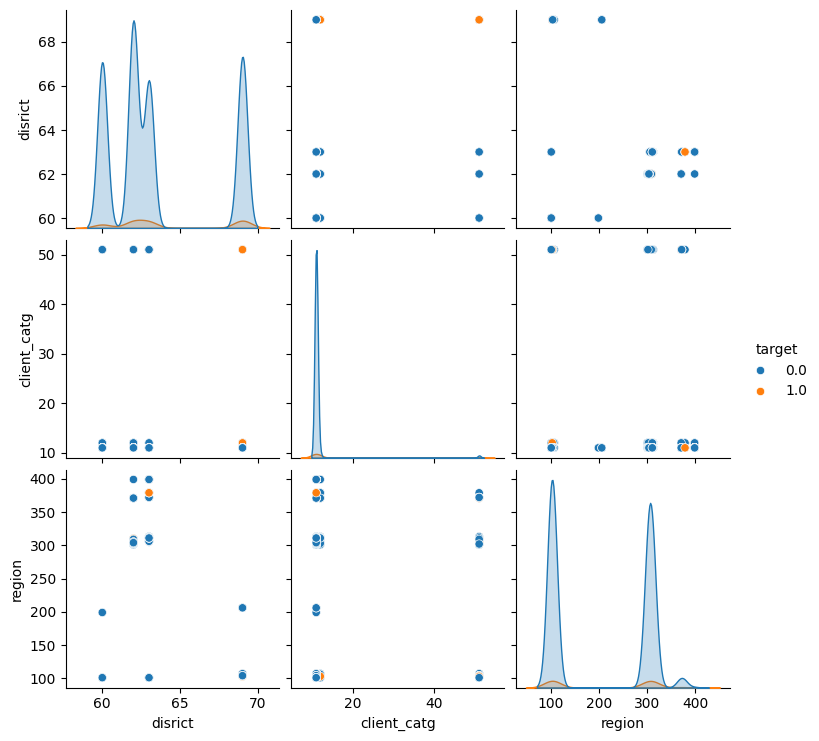

In [13]:
sns.pairplot(client_train.select_dtypes("number"), hue="target")
plt.show()

In [54]:
_maxs = invoice_train.groupby("client_id")["invoice_date"].max()
_mins = invoice_train.groupby("client_id")["invoice_date"].min()

In [55]:
invoice_train.groupby("client_id")["consommation_level_1"].sum()/(pd.to_datetime(_maxs) - pd.to_datetime(_mins)).dt.days

client_id
train_Client_0        2.516629
train_Client_1        4.198860
train_Client_10       2.921154
train_Client_100      0.009009
train_Client_1000     5.862461
                        ...   
train_Client_99995    0.027260
train_Client_99996    3.302991
train_Client_99997    3.484934
train_Client_99998    4.918033
train_Client_99999    5.647541
Length: 135493, dtype: float64

#### Inspecting Invoice Data

In [14]:
invoice_train.describe()

tarif_type  counter_number  counter_code  reading_remarque  \
count  4.476749e+06    4.476749e+06  4.476749e+06      4.476749e+06   
mean   2.012804e+01    1.230587e+11  1.724884e+02      7.321702e+00   
std    1.347256e+01    1.657267e+12  1.338871e+02      1.571654e+00   
min    8.000000e+00    0.000000e+00  0.000000e+00      5.000000e+00   
25%    1.100000e+01    1.211080e+05  5.000000e+00      6.000000e+00   
50%    1.100000e+01    4.945610e+05  2.030000e+02      8.000000e+00   
75%    4.000000e+01    1.115161e+06  2.070000e+02      9.000000e+00   
max    4.500000e+01    2.798115e+13  6.000000e+02      4.130000e+02   

       counter_coefficient  consommation_level_1  consommation_level_2  \
count         4.476749e+06          4.476749e+06          4.476749e+06   
mean          1.003040e+00          4.109795e+02          1.093225e+02   
std           3.083466e-01          7.573080e+02          1.220123e+03   
min           0.000000e+00          0.000000e+00          0.000000e+00   
25%           1.000000e+00          7.900000e+01          0.000000e+00   
50%           1.000000e+00          2.740000e+02          0.000000e+00   
75%           1.000000e+00          6.000000e+02          0.000000e+00   
max           5.000000e+01          9.999100e+05          9.990730e+05   

       consommation_level_3  consommation_level_4     old_index     new_index  \
count          4.476749e+06          4.476749e+06  4.476749e+06  4.476749e+06   
mean           2.030620e+01          5.292588e+01  1.776700e+04  1.834970e+04   
std            1.574239e+02          8.754725e+02  4.036693e+04  4.095321e+04   
min            0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
25%            0.000000e+00          0.000000e+00  1.791000e+03  2.056000e+03   
50%            0.000000e+00          0.000000e+00  7.690000e+03  8.192000e+03   
75%            0.000000e+00          0.000000e+00  2.166000e+04  2.234300e+04   
max            6.449200e+04          5.479460e+05  2.800280e+06  2.870972e+06   

       months_number  counter_type  
count   4.476749e+06  4.476749e+06  
mean    4.483095e+01  3.121334e-01  
std     3.128335e+03  4.633640e-01  
min     0.000000e+00  0.000000e+00  
25%     4.000000e+00  0.000000e+00  
50%     4.000000e+00  0.000000e+00  
75%     4.000000e+00  1.000000e+00  
max     6.366240e+05  1.000000e+00

### Taking a look at what the invoice data of a non-fraudulent looks like

In [29]:
non_fraud_ids = client_train[client_train["target"]==0]["client_id"]
fraud_ids = client_train[client_train["target"]==1]["client_id"]

In [33]:
normal = non_fraud_ids.sample(1).values[0]
fraudster = fraud_ids.sample(1).values[0]

In [37]:
invoice_train[invoice_train["client_id"]==normal].sort_values("invoice_date")

client_id invoice_date  tarif_type  counter_number  \
3219995  train_Client_65884   2010-04-22          40         1904159   
3219994  train_Client_65884   2010-04-22          11           32085   
3219983  train_Client_65884   2010-08-17          40         1904159   
3219978  train_Client_65884   2010-08-17          11           32085   
3219979  train_Client_65884   2010-12-22          11           32085   
3219986  train_Client_65884   2010-12-22          40         1904159   
3219987  train_Client_65884   2011-04-25          11           32085   
3219988  train_Client_65884   2011-04-25          40         1904159   
3219989  train_Client_65884   2011-08-18          11           32085   
3219990  train_Client_65884   2011-08-18          40         1904159   
3219985  train_Client_65884   2011-12-20          40         1904159   
3219991  train_Client_65884   2011-12-20          11           32085   
3219992  train_Client_65884   2012-04-20          11           32085   
3219993  train_Client_65884   2012-04-20          40         1904159   
3219984  train_Client_65884   2013-04-23          11           32085   
3219981  train_Client_65884   2013-04-23          40         1904159   
3219982  train_Client_65884   2015-04-20          40         1904159   
3219980  train_Client_65884   2015-04-20          11           32085   

        counter_statue  counter_code  reading_remarque  counter_coefficient  \
3219995              0             5                 6                    1   
3219994              0           413                 6                    1   
3219983              0             5                 6                    1   
3219978              0           413                 6                    1   
3219979              0           413                 6                    1   
3219986              0             5                 6                    1   
3219987              0           413                 6                    1   
3219988              0             5                 8                    1   
3219989              0           413                 9                    1   
3219990              0             5                 6                    1   
3219985              0             5                 9                    1   
3219991              0           413                 8                    1   
3219992              0           413                 6                    1   
3219993              0             5                 8                    1   
3219984              0           413                 8                    1   
3219981              0             5                 8                    1   
3219982              0             5                 6                    1   
3219980              0           413                 8                    1   

         consommation_level_1  consommation_level_2  consommation_level_3  \
3219995                    70                     0                     0   
3219994                    79                     0                     0   
3219983                   141                     0                     0   
3219978                   185                     0                     0   
3219979                   185                     0                     0   
3219986                   140                     0                     0   
3219987                   362                     0                     0   
3219988                    71                     0                     0   
3219989                  1077                     0                     0   
3219990                    50                     0                     0   
3219985                   283                     0                     0   
3219991                   283                     0                     0   
3219992                   599                     0                     0   
3219993                    25                     0                  

In [36]:
invoice_train[invoice_train["client_id"]==fraudster].sort_values("invoice_date")

client_id invoice_date  tarif_type  counter_number  \
865498  train_Client_123469   2005-09-29          40          937700   
865519  train_Client_123469   2005-09-29          11         1107047   
865499  train_Client_123469   2006-02-21          11         1107047   
865500  train_Client_123469   2006-02-21          40          937700   
865501  train_Client_123469   2006-06-20          11         1107047   
865503  train_Client_123469   2006-06-20          40          937700   
865522  train_Client_123469   2006-10-13          11         1107047   
865546  train_Client_123469   2006-10-13          40          937700   
865504  train_Client_123469   2007-02-16          11         1107047   
865505  train_Client_123469   2007-02-16          40          937700   
865506  train_Client_123469   2007-06-19          11         1107047   
865507  train_Client_123469   2007-06-19          40          937700   
865521  train_Client_123469   2008-02-19          40          937700   
865520  train_Client_123469   2008-02-19          11         1107047   
865502  train_Client_123469   2009-06-17          11         1107047   
865545  train_Client_123469   2009-06-17          40          937700   
865529  train_Client_123469   2011-02-18          11         1107047   
865528  train_Client_123469   2011-02-18          40          937700   
865527  train_Client_123469   2011-06-15          11         1107047   
865526  train_Client_123469   2011-06-15          40          937700   
865533  train_Client_123469   2012-02-15          40          937700   
865532  train_Client_123469   2012-02-15          11         1107047   
865525  train_Client_123469   2012-06-13          11         1107047   
865524  train_Client_123469   2012-06-13          40          937700   
865534  train_Client_123469   2012-12-10          11         1107047   
865497  train_Client_123469   2012-12-10          40          937700   
865535  train_Client_123469   2013-02-19          11         1107047   
865547  train_Client_123469   2013-02-19          40          937700   
865537  train_Client_123469   2013-12-06          40          937700   
865536  train_Client_123469   2013-12-06          11         1107047   
865530  train_Client_123469   2014-02-18          40          937700   
865523  train_Client_123469   2014-02-18          11         1107047   
865538  train_Client_123469   2014-06-16          40          937700   
865531  train_Client_123469   2014-06-16          11         1107047   
865539  train_Client_123469   2014-10-20          11         1107047   
865540  train_Client_123469   2014-10-20          40          937700   
865543  train_Client_123469   2015-02-18          40          937700   
865542  train_Client_123469   2015-02-18          11         1107047   
865508  train_Client_123469   2015-10-16          11         1107047   
865509  train_Client_123469   2015-10-16          40          937700   
865544  train_Client_123469   2015-11-06          11         1107047   
865541  train_Client_123469   2015-11-06          40          937700   
865511  train_Client_123469   2016-02-17          40          937700   
865510  train_Client_123469   2016-02-17          11         1107047   
865513  train_Client_123469   2017-02-14          40          937700   
865512  train_Client_123469   2017-02-14          11   2155707123900   
865515  train_Client_123469   2017-09-06          40          937700   
865514  train_Client_123469   2017-09-06          11   2155707123900   
865517  train_Client_123469   2018-02-14          40          937700   
865516  train_Client_123469   2018-02-14          11   2155707123900   
865518  train_Client_123469   2018-07-06          11   2155707123900   
865548  train_Client_123469   2018-07-06          40          937700   

       counter_statue  counter_code  reading_remarque  counter_coefficient  \
865498              0             5                 6                    1   
865519              0           203          

In [24]:
m = pd.to_datetime(invoice_train["invoice_date"]).max()

In [25]:
(pd.to_datetime(invoice_train["invoice_date"])-m).dt.days

0         -2084
1         -2444
2         -1720
3         -1608
4         -1115
           ... 
4476744   -5223
4476745   -5101
4476746   -8473
4476747   -8593
4476748   -8717
Name: invoice_date, Length: 4476749, dtype: int64

In [26]:
client_train

disrict           client_id  client_catg  region creation_date  target
0            60      train_Client_0           11     101    31/12/1994     0.0
1            69      train_Client_1           11     107    29/05/2002     0.0
2            62     train_Client_10           11     301    13/03/1986     0.0
3            69    train_Client_100           11     105    11/07/1996     0.0
4            62   train_Client_1000           11     303    14/10/2014     0.0
...         ...                 ...          ...     ...           ...     ...
135488       62  train_Client_99995           11     304    26/07/2004     0.0
135489       63  train_Client_99996           11     311    25/10/2012     0.0
135490       63  train_Client_99997           11     311    22/11/2011     0.0
135491       60  train_Client_99998           11     101    22/12/1993     0.0
135492       60  train_Client_99999           11     101    18/02/1986     0.0

[135493 rows x 6 columns]

In [38]:
client_train

disrict           client_id  client_catg  region creation_date  target
0            60      train_Client_0           11     101    31/12/1994     0.0
1            69      train_Client_1           11     107    29/05/2002     0.0
2            62     train_Client_10           11     301    13/03/1986     0.0
3            69    train_Client_100           11     105    11/07/1996     0.0
4            62   train_Client_1000           11     303    14/10/2014     0.0
...         ...                 ...          ...     ...           ...     ...
135488       62  train_Client_99995           11     304    26/07/2004     0.0
135489       63  train_Client_99996           11     311    25/10/2012     0.0
135490       63  train_Client_99997           11     311    22/11/2011     0.0
135491       60  train_Client_99998           11     101    22/12/1993     0.0
135492       60  train_Client_99999           11     101    18/02/1986     0.0

[135493 rows x 6 columns]

In [39]:
t = pd.to_datetime(invoice_train.set_index("client_id")["invoice_date"]) - pd.to_datetime(client_train.set_index("client_id")["creation_date"], dayfirst=True)

In [67]:
t.dt.days.dtype

dtype('int64')

In [9]:
def process_data(client, invoice):
    client = client.set_index("client_id")
    invoice = invoice.set_index("client_id")
    invoice["days_from_start"] = (pd.to_datetime(invoice["invoice_date"]) - pd.to_datetime(client["creation_date"], dayfirst=True)).dt.days
    invoice = invoice.reset_index()
    client = client.reset_index()
    num_cols = list(invoice.select_dtypes("number"))

    ## adding index difference
    invoice["index_diff"] = invoice["new_index"] - invoice["old_index"]
    
    invoice_grouped = invoice.groupby("client_id")[num_cols].agg(["mean", "std", "sum"])

    
    series = []
    for col_a, col_b in invoice_grouped.columns:
        new_col = f"{col_a}_{col_b}"
        item = invoice_grouped[col_a, col_b].rename(new_col)
        if col_b == "std":
            item = item.fillna(0) ## fill with zero for clients who only have one entry in the invoice dataset
        series.append(item)

    ## appending to series
    series.append(get_count_agg(invoice))
    series.append(get_max_or_min_agg(invoice, cols=["consommation_level_1","consommation_level_2","consommation_level_3","consommation_level_4"]))
    series.append(get_max_or_min_agg(invoice, cols=["consommation_level_1","consommation_level_2","consommation_level_3","consommation_level_4"], min=True))
    series.append(get_nunique_agg(invoice, ["tarif_type"]))
    series.append(get_invoice_span_agg(invoice))

    
    inv_df = pd.concat(series, axis=1)
    ## adding consommation_level_1 per days
    inv_df["consom1_per_span"] = inv_df["consommation_level_1_sum"]/inv_df["invoice_span"]
    full_df = pd.concat([inv_df, client.set_index("client_id")], axis=1)

    cols_to_drop=["tarif_type", "old_index"]
    
    for col in cols_to_drop:
        full_df.drop([f"{col}_mean", f"{col}_std", f"{col}_sum"], axis=1, inplace=True)

    full_df.drop(["creation_date",'days_from_start_sum', 'days_from_start_mean'], axis=1, inplace=True)

    full_df = full_df.ffill()

    return full_df


def get_max_or_min_agg(invoice, cols, min=False):
    if min:
        return invoice.groupby("client_id")[cols].min().rename(columns=dict([(col, f"{col}_min") for col in cols]))
    else:
        return invoice.groupby("client_id")[cols].max().rename(columns=dict([(col, f"{col}_max") for col in cols]))


def get_count_agg(invoice):
    return invoice.groupby("client_id")["client_id"].count().rename("invoice_count")

def get_nunique_agg(invoice, cols):
    return invoice.groupby("client_id")[cols].nunique().rename(columns=dict([(col, f"{col}_unique_count") for col in cols]))

def get_invoice_span_agg(invoice):
    return (pd.to_datetime(invoice_train.set_index("client_id")["invoice_date"]).groupby("client_id").apply(lambda x: x.max()-x.min())).dt.days.rename("invoice_span")+1

In [28]:
# invoice_train["counter_statue"].map("A":111)

counter_statue
0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: count, dtype: int64

In [152]:
# get_max_or_min_agg(invoice_train, ["consommation_level_1", "consommation_level_2"], min=False)
# get_count_agg(invoice_train)
# pd.to_datetime(invoice_train.groupby("client_id")["invoice_date"]).apply(lambda x: x.max()-x.min())
# pd.to_datetime(invoice_train.set_index("client_id")["invoice_date"]).groupby("client_id").apply(lambda x: x.max()-x.min()+1).dt.days.rename("ldfj").sort_values()
get_invoice_span_agg(invoice_train).sort_values()

client_id
train_Client_112734       1
train_Client_1667         1
train_Client_105015       1
train_Client_596          1
train_Client_5960         1
                       ... 
train_Client_23835     5443
train_Client_4652      5443
train_Client_82445     5443
train_Client_34283     5443
train_Client_2082      5443
Name: invoice_span, Length: 135493, dtype: int64

In [99]:
invoice_train[invoice_train["client_id"]=="train_Client_0"]["consommation_level_1"].max() - invoice_train[invoice_train["client_id"]=="train_Client_0"]["consommation_level_1"].min()

1162

In [63]:
invoice_train.groupby("client_id")[["consommation_level_1", "consommation_level_2"]].max().rename(columns={"consommation_level_1":"dlfj"})

dlfj  consommation_level_2
client_id                                     
train_Client_0      1200                   186
train_Client_1      1207                     0
train_Client_10     2400                   682
train_Client_100      15                     0
train_Client_1000    800                   400
...                  ...                   ...
train_Client_99995   139                     0
train_Client_99996   800                    31
train_Client_99997  1075                     0
train_Client_99998   400                   135
train_Client_99999   603                     0

[135493 rows x 2 columns]

In [ ]:
num_cols = list(invoice_train.select_dtypes("number").columns)

invoice_train_grouped = invoice_train.groupby("client_id")[num_cols].agg(["mean", "std", "sum"])

In [47]:
invoice_train_grouped.columns

MultiIndex([(          'tarif_type', 'mean'),
            (          'tarif_type',  'std'),
            (          'tarif_type',  'sum'),
            (      'counter_number', 'mean'),
            (      'counter_number',  'std'),
            (      'counter_number',  'sum'),
            (        'counter_code', 'mean'),
            (        'counter_code',  'std'),
            (        'counter_code',  'sum'),
            (    'reading_remarque', 'mean'),
            (    'reading_remarque',  'std'),
            (    'reading_remarque',  'sum'),
            ( 'counter_coefficient', 'mean'),
            ( 'counter_coefficient',  'std'),
            ( 'counter_coefficient',  'sum'),
            ('consommation_level_1', 'mean'),
            ('consommation_level_1',  'std'),
            ('consommation_level_1',  'sum'),
            ('consommation_level_2', 'mean'),
            ('consommation_level_2',  'std'),
            ('consommation_level_2',  'sum'),
            ('consommation_level_3

In [48]:
# series = []
# for col_a, col_b in invoice_train_grouped.columns:
#     new_col = f"{col_a}_{col_b}"
#     item = invoice_train_grouped[col_a, col_b].rename(new_col)
#     if col_b == "std":
#         item = item.fillna(0) ## fill with zero for clients who only have one entry in the invoice dataset
#     series.append(item)

# inv_df = pd.concat(series, axis=1)

# full_train_df = pd.concat([inv_df, client_train.set_index("client_id")], axis=1)

# full_train_df.isna().sum()

In [49]:
invoice_train_grouped["tarif_type", "std"][np.isnan(invoice_train_grouped["tarif_type", "std"])].index[9]

'train_Client_100250'

In [50]:
invoice_train[invoice_train["client_id"]=='train_Client_100018']

client_id invoice_date  tarif_type  counter_number  \
854  train_Client_100018   2019-05-03          11   2178700025696   

    counter_statue  counter_code  reading_remarque  counter_coefficient  \
854              0           413                 8                    1   

     consommation_level_1  consommation_level_2  consommation_level_3  \
854                   600                   300                   325   

     consommation_level_4  old_index  new_index  months_number counter_type  
854                     0       4865       6090              3         ELEC

In [ ]:
# num_cols = list(invoice_train.select_dtypes("number").columns) + ["days_from_start"]

In [10]:
full_train_df = process_data(client_train, invoice_train)

In [154]:
full_train_df.columns

Index(['counter_number_mean', 'counter_number_std', 'counter_number_sum',
       'counter_code_mean', 'counter_code_std', 'counter_code_sum',
       'reading_remarque_mean', 'reading_remarque_std', 'reading_remarque_sum',
       'counter_coefficient_mean', 'counter_coefficient_std',
       'counter_coefficient_sum', 'consommation_level_1_mean',
       'consommation_level_1_std', 'consommation_level_1_sum',
       'consommation_level_2_mean', 'consommation_level_2_std',
       'consommation_level_2_sum', 'consommation_level_3_mean',
       'consommation_level_3_std', 'consommation_level_3_sum',
       'consommation_level_4_mean', 'consommation_level_4_std',
       'consommation_level_4_sum', 'new_index_mean', 'new_index_std',
       'new_index_sum', 'months_number_mean', 'months_number_std',
       'months_number_sum', 'counter_type_mean', 'counter_type_std',
       'counter_type_sum', 'days_from_start_std', 'invoice_count',
       'consommation_level_1_max', 'consommation_level_2_max',

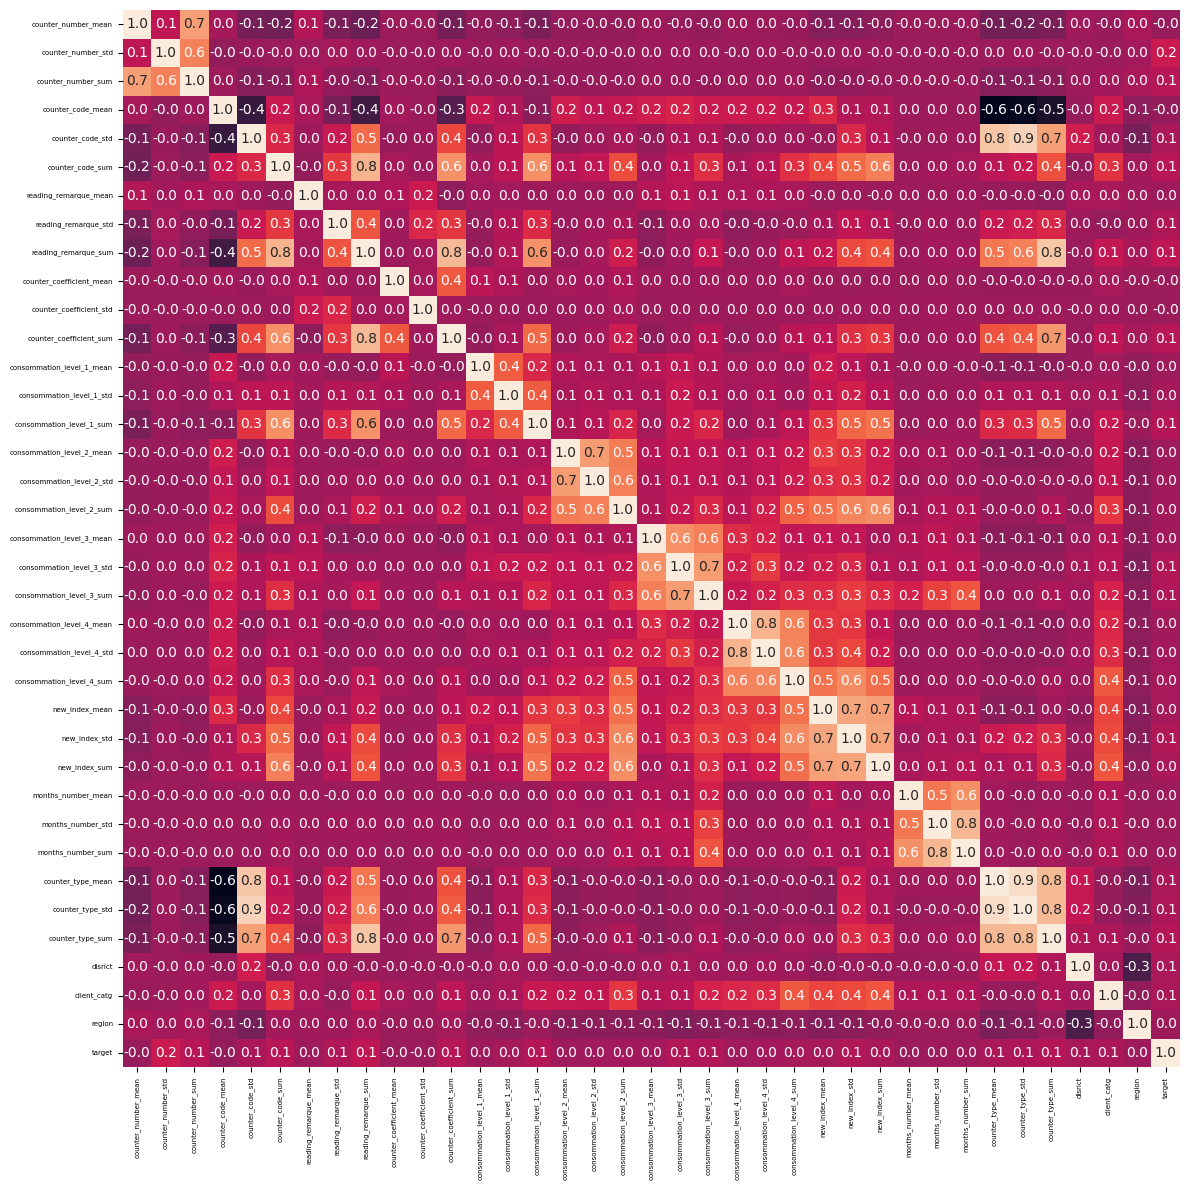

In [26]:
fig = plt.figure(figsize=(12,12))
g = sns.heatmap(full_train_df.select_dtypes("number").corr(), annot=True, fmt=".1f", square=True, cbar=False)
g.set_xticklabels(labels=g.get_xmajorticklabels(),fontsize=5)
g.set_yticklabels(labels=g.get_ymajorticklabels(),fontsize=5)
plt.tight_layout()
plt.show()

### Insights
- seems the `tarif_type` is highly correlated with `counter_type`
- seems the `old_index` is highly correlated with `new_index`

In [27]:
# cols_to_drop=["tarif_type", "old_index"]

# for col in cols_to_drop:
#     full_train_df.drop([f"{col}_mean", f"{col}_std", f"{col}_sum"], axis=1, inplace=True)

In [10]:
full_train_df

counter_number_mean  counter_number_std  \
client_id                                                     
train_Client_0             1.335667e+06        0.000000e+00   
train_Client_1             6.789020e+05        0.000000e+00   
train_Client_10            5.727650e+05        0.000000e+00   
train_Client_100           2.078000e+03        0.000000e+00   
train_Client_1000          1.957500e+04        0.000000e+00   
...                                 ...                 ...   
train_Client_99995         5.423355e+05        3.729146e+05   
train_Client_99996         1.837554e+06        2.172997e+06   
train_Client_99997         1.602303e+05        1.296327e+05   
train_Client_99998         1.253571e+06        0.000000e+00   
train_Client_99999         5.609480e+05        0.000000e+00   

                    counter_number_sum  counter_code_mean  counter_code_std  \
client_id                                                                     
train_Client_0                46748345         203.685714          1.529541   
train_Client_1                25119374         203.000000          0.000000   
train_Client_10               10309770         203.222222          0.942809   
train_Client_100                 41560         413.000000          0.000000   
train_Client_1000               274050         207.000000          0.000000   
...                                ...                ...               ...   
train_Client_99995            38505820         110.267606        101.628027   
train_Client_99996            75339726         103.536585        102.224287   
train_Client_99997             5768290         128.444444         99.871473   
train_Client_99998             2507142         202.000000          0.000000   
train_Client_99999             1682844         203.000000          0.000000   

                    counter_code_sum  reading_remarque_mean  \
client_id                                                     
train_Client_0                  7129               6.971429   
train_Client_1                  7511               7.216216   
train_Client_10                 3658               7.055556   
train_Client_100                8260               6.150000   
train_Client_1000               2898               8.857143   
...                              ...                    ...   
train_Client_99995              7829               6.000000   
train_Client_99996              4245               8.487805   
train_Client_99997              4624               9.000000   
train_Client_99998               404               7.500000   
train_Client_99999               609               6.000000   

                    reading_remarque_std  reading_remarque_sum  \
client_id                                                        
train_Client_0                  1.248192                   244   
train_Client_1                  1.377097                   267   
train_Client_10                 1.258955                   127   
train_Client_100                0.670820                   123   
train_Client_1000               0.363137                   124   
...                                  ...                   ...   
train_Client_99995              0.000000                   426   
train_Client_99996              1.142846                   348   
train_Client_99997              0.000000                   324   
train_Client_99998              2.121320                    15   
train_Client_99999              0.000000                    18   

                    counter_coefficient_mean  ...  months_number_mean  \
client_id                                     ...                       
train_Client_0                           1.0  ...            4.628571   
train_Client_1                           1.0  ...            4.324324   
train_Client_10                          1.0  ...            6.444444   
train_Client_100                         1.0  ...            4.200000   
train_Client_1000                        1.0  ...      

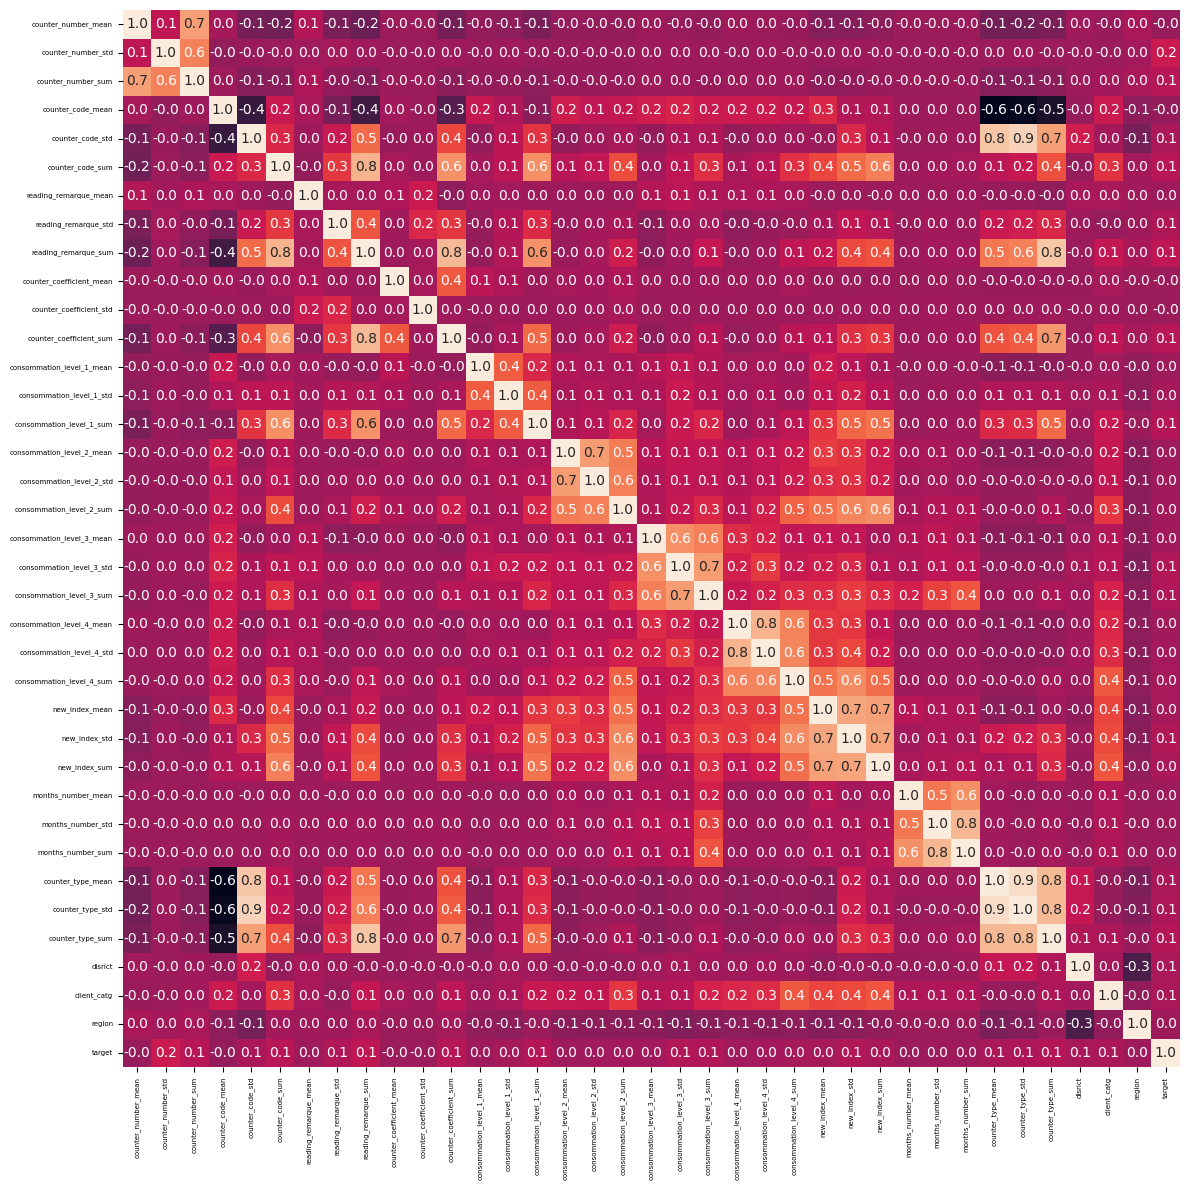

In [76]:
# fig = plt.figure(figsize=(12,12))
# g = sns.heatmap(full_train_df.select_dtypes("number").corr(), annot=True, fmt=".1f", square=True, cbar=False)
# g.set_xticklabels(labels=g.get_xmajorticklabels(),fontsize=5)
# g.set_yticklabels(labels=g.get_ymajorticklabels(),fontsize=5)
# plt.tight_layout()
# plt.show()

In [145]:
full_train_df.max()

counter_number_mean          2.739110e+13
counter_number_std           1.922701e+13
counter_number_sum           9.760824e+14
counter_code_mean            6.000000e+02
counter_code_std             3.818377e+02
counter_code_sum             1.820700e+05
reading_remarque_mean        4.130000e+02
reading_remarque_std         9.292334e+01
reading_remarque_sum         4.956000e+03
counter_coefficient_mean     5.000000e+01
counter_coefficient_std      4.480896e+00
counter_coefficient_sum      6.360000e+03
consommation_level_1_mean    9.992000e+04
consommation_level_1_std     7.009400e+04
consommation_level_1_sum     1.290954e+06
consommation_level_2_mean    1.156830e+05
consommation_level_2_std     1.637051e+05
consommation_level_2_sum     2.245578e+06
consommation_level_3_mean    3.852686e+04
consommation_level_3_std     1.065784e+04
consommation_level_3_sum     4.636550e+05
consommation_level_4_mean    7.917978e+04
consommation_level_4_std     1.095861e+05
consommation_level_4_sum     2.850

## Preparing for training

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

## models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [12]:
random_state = 42
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [13]:
X = full_train_df.drop(["target"], axis=1)
y = full_train_df["target"]

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Logistic Regression

In [159]:
params = {
    "C": [0.2,0.5,1]
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), params, scoring="roc_auc", cv=skf, verbose=10)
grid_lr.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START C=0.2.......................................................
[CV 1/5; 1/3] END ........................C=0.2;, score=0.774 total time=   3.7s
[CV 2/5; 1/3] START C=0.2.......................................................
[CV 2/5; 1/3] END ........................C=0.2;, score=0.772 total time=   4.4s
[CV 3/5; 1/3] START C=0.2.......................................................
[CV 3/5; 1/3] END ........................C=0.2;, score=0.764 total time=   3.8s
[CV 4/5; 1/3] START C=0.2.......................................................
[CV 4/5; 1/3] END ........................C=0.2;, score=0.767 total time=   3.9s
[CV 5/5; 1/3] START C=0.2.......................................................
[CV 5/5; 1/3] END ........................C=0.2;, score=0.766 total time=   3.4s
[CV 1/5; 2/3] START C=0.5.......................................................
[CV 1/5; 2/3] END ........................C=0.5;,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.2, 0.5, 1]}, scoring='roc_auc', verbose=10)

In [160]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.7687594850553149
{'C': 0.5}


##### Decision Tree Classifier

In [161]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2,4,6,8],
    "max_features": ["sqrt","log2",None],
    "class_weight": ["balanced",None]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_dt.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt
[CV 1/5; 1/72] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt;, score=0.704 total time=   0.1s
[CV 2/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt
[CV 2/5; 1/72] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt;, score=0.703 total time=   0.2s
[CV 3/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt
[CV 3/5; 1/72] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt;, score=0.700 total time=   0.2s
[CV 4/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt
[CV 4/5; 1/72] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt;, score=0.693 total time=   0.2s
[CV 5/5; 1/72] START class_weight=balanced, criterion=gini, max_depth=2, max_features=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='roc_auc', verbose=10)

In [162]:
print(grid_dt.best_score_)
print(grid_dt.best_params_)

# 0.8008869933761786
# {'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None}

0.8008775932549478
{'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None}


##### Scalar Vector Classifier

In [58]:
params = {
    "C": [0.5, 1.0, 1.5],
    "class_weight": [None, "balanced"]
}

grid_svc = GridSearchCV(SVC(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_svc.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.5, class_weight=None....................................
[CV 1/5; 1/6] END .....C=0.5, class_weight=None;, score=0.682 total time=29.8min
[CV 2/5; 1/6] START C=0.5, class_weight=None....................................
[CV 2/5; 1/6] END .....C=0.5, class_weight=None;, score=0.657 total time=20.7min
[CV 3/5; 1/6] START C=0.5, class_weight=None....................................
[CV 3/5; 1/6] END .....C=0.5, class_weight=None;, score=0.671 total time=17.2min
[CV 4/5; 1/6] START C=0.5, class_weight=None....................................


KeyboardInterrupt: 

In [ ]:
print(grid_svc.best_score_)
print(grid_svc.best_params_)

##### Random Forest Classifier

In [ ]:
params = {
    "n_estimators": [500, 1000],
    "max_depth": [2,4,6,8],
    "class_weight": [None, "balanced", "balanced_subsample"]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_rfc.fit(X,y)
# params = {
#     "n_estimators": [100,500, 1000],
#     "max_depth": [2,4,6,8],
# }

# grid_rfc = GridSearchCV(RandomForestClassifier(class_weight="balanced_subsample"), params, scoring="roc_auc", cv=skf, verbose=10)
# grid_rfc.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 1/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.777 total time= 1.7min
[CV 2/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 2/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.787 total time= 1.6min
[CV 3/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 3/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.790 total time= 1.5min
[CV 4/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 4/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.773 total time= 1.3min
[CV 5/5; 1/24] START class_weight=None, max_depth=2, n_estimators=500...........
[CV 5/5; 1/24] END class_weight=None, max_depth=2, n_estimators=500;, score=0.786 total time= 1.6min
[CV 1/5; 2/24] START class_w

In [ ]:
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)
# 0.826150770636995
# {'class_weight': None, 'max_depth': 8, 'n_estimators': 500}

##### LGBMClassifier

In [ ]:
params = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.09, 0.1, 0.4],
    "class_weight": [None, "balanced"]
}

grid_lgbm = GridSearchCV(LGBMClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_lgbm.fit(X,y)
# params = {
#     "n_estimators": [200, 500],
#     "max_depth": [6,8],
#     # "learning_rate": [0.09, 0.1, 0.4],
#     # "class_weight": [None, "balanced"]
# }

# temp_grid = GridSearchCV(LGBMClassifier(num_leaves=60, boosting_type="rf"), params, scoring="roc_auc", cv=skf, verbose=10)
# temp_grid.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START class_weight=None, learning_rate=0.09, max_depth=2, n_estimators=200
[LightGBM] [Info] Number of positive: 6053, number of negative: 102341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10469
[LightGBM] [Info] Number of data points in the train set: 108394, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055843 -> initscore=-2.827756
[LightGBM] [Info] Start training from score -2.827756
[CV 1/5; 1/72] END class_weight=None, learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.839 total time=   5.2s
[CV 2/5; 1/72] START class_weight=None, learning_rate=0.09, max_depth=2, n_estimators=200
[LightGBM] [Info] Number of positive: 6053, number of negative: 102341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead

In [16]:
print(grid_lgbm.best_score_)
print(grid_lgbm.best_params_)

0.8599222244304402
{'class_weight': None, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


In [19]:
print(grid_lgbm.best_score_)
print(grid_lgbm.best_params_)

# 0.8571949371151912
# {'class_weight': None, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

## dart
# 0.860
# {'max-depth':8, n_estimators: 500, num_leaves: 60}

0.8571949371151912
{'class_weight': None, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


##### Catboost Classifier

In [ ]:
params = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.09, 0.1, 0.8]
}

grid_cat = GridSearchCV(CatBoostClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_cat.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
0:	learn: 0.5775298	total: 211ms	remaining: 42.1s
1:	learn: 0.4865991	total: 228ms	remaining: 22.6s
2:	learn: 0.4212060	total: 243ms	remaining: 16s
3:	learn: 0.3673401	total: 259ms	remaining: 12.7s
4:	learn: 0.3284111	total: 273ms	remaining: 10.7s
5:	learn: 0.2958008	total: 288ms	remaining: 9.3s
6:	learn: 0.2756631	total: 304ms	remaining: 8.39s
7:	learn: 0.2563300	total: 319ms	remaining: 7.66s
8:	learn: 0.2403475	total: 334ms	remaining: 7.09s
9:	learn: 0.2301262	total: 349ms	remaining: 6.63s
10:	learn: 0.2211660	total: 364ms	remaining: 6.25s
11:	learn: 0.2137454	total: 377ms	remaining: 5.91s
12:	learn: 0.2077160	total: 392ms	remaining: 5.64s
13:	learn: 0.2030688	total: 409ms	remaining: 5.43s
14:	learn: 0.1990320	total: 436ms	remaining: 5.38s
15:	learn: 0.1954601	total: 454ms	remaining: 5.22s
16:	learn: 0.1926487	total: 472ms	remaining: 5.08s
17:

In [ ]:
print(grid_cat.best_score_)
print(grid_cat.best_params_)

##### XGBOOST

In [48]:
from xgboost import XGBClassifier

In [49]:
params = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.09, 0.1, 0.8]
}

grid_xgb = GridSearchCV(XGBClassifier(), params, scoring="roc_auc", cv=skf, verbose=10)
grid_xgb.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 1/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.838 total time=   4.7s
[CV 2/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 2/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.845 total time=   4.1s
[CV 3/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 3/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.848 total time=   4.2s
[CV 4/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 4/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.846 total time=   4.3s
[CV 5/5; 1/36] START learning_rate=0.09, max_depth=2, n_estimators=200..........
[CV 5/5; 1/36] END learning_rate=0.09, max_depth=2, n_estimators=200;, score=0.837 total time=   4.3s
[CV 1/5; 2/36] START le

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_t...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.09, 0.1, 0.8],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [200, 500, 1000]},
             scoring='roc_auc', verbose=10)

In [51]:
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

0.8584854800921258
{'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 200}


##### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [ ]:
estimators = [
    ("xgbc": XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.09),
    ("lgbm": XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1),
]

### Predicting for Submission

In [29]:
full_test_df = process_data(client_test, invoice_test)
# full_test_df = process_data(client_test, invoice_test.drop("counter_statue", axis=1))

In [31]:
X_sub = scaler.transform(full_test_df)

In [33]:
preds = grid_lgbm.predict_proba(X_sub)[:,1]

In [34]:
preds

array([0.01901005, 0.1364746 , 0.02417908, ..., 0.05347362, 0.06979169,
       0.04740346])

### Submitting

In [35]:
sample_sub = pd.read_csv("x__data/SampleSubmission.csv")
sample_sub

client_id    target
0         test_Client_0  0.957281
1         test_Client_1  0.996425
2        test_Client_10  0.612359
3       test_Client_100  0.776933
4      test_Client_1000  0.571046
...                 ...       ...
58064  test_Client_9995  0.882548
58065  test_Client_9996  0.715918
58066  test_Client_9997  0.285178
58067  test_Client_9998  0.154661
58068  test_Client_9999  0.556017

[58069 rows x 2 columns]

In [36]:
test_ids = full_test_df.index

In [37]:
# submission = sample_sub.copy()
# submission["target"]= preds
submission = pd.DataFrame({"client_id": test_ids, "target": preds})

In [38]:
submission

client_id    target
0            test_Client_0  0.019010
1            test_Client_1  0.136475
2           test_Client_10  0.024179
3          test_Client_100  0.055194
4         test_Client_1000  0.036613
...                    ...       ...
193557  train_Client_99995  0.059506
193558  train_Client_99996  0.054250
193559  train_Client_99997  0.053474
193560  train_Client_99998  0.069792
193561  train_Client_99999  0.047403

[193562 rows x 2 columns]

In [39]:
# save_name = "submission_lgbm-3.csv"
# submission.to_csv(f"x__submissions/{save_name}", index=False)

In [41]:
invoice_test["counter_statue"].value_counts()

counter_statue
0    1897688
1      31805
5       8968
4       1177
3         80
2         12
Name: count, dtype: int64